In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv("/kaggle/input/heart-disease-data/heart_disease_uci.csv")
df.head()
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-data/heart_disease_uci.csv


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [3]:
#Retirando valores nulos da base e verificando resultado
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.7+ KB


In [4]:

y = (df['num'] > 0).astype(int)
y.head()

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

In [5]:
#Dropping fields
df.drop(['id','dataset', 'num'],axis = 1, inplace = True)

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pandas as pd

colunas = df.columns

one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['sex', 'cp',  'fbs', 'restecg', 
    'exang', 'slope', 'thal']
),
    remainder = 'passthrough', 
    sparse_threshold=0)
df_encoded = one_hot.fit_transform(df)
column_names = one_hot.get_feature_names_out(colunas)
x = pd.DataFrame(df_encoded, columns = column_names)
x.head()

,onehotencoder__sex_Male,onehotencoder__cp_asymptomatic,onehotencoder__cp_atypical angina,onehotencoder__cp_non-anginal,onehotencoder__cp_typical angina,onehotencoder__fbs_True,onehotencoder__restecg_lv hypertrophy,onehotencoder__restecg_normal,onehotencoder__restecg_st-t abnormality,onehotencoder__exang_True,...,onehotencoder__slope_upsloping,onehotencoder__thal_fixed defect,onehotencoder__thal_normal,onehotencoder__thal_reversable defect,remainder__age,remainder__trestbps,remainder__chol,remainder__thalch,remainder__oldpeak,remainder__ca
0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,63.0,145.0,233.0,150.0,2.3,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,67.0,160.0,286.0,108.0,1.5,3.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,67.0,120.0,229.0,129.0,2.6,2.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,37.0,130.0,250.0,187.0,3.5,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,41.0,130.0,204.0,172.0,1.4,0.0


In [7]:
#Test split

from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(x_train), len(x_test)))

Treinaremos com 224 elementos e testaremos com 75 elementos


In [8]:
#Transforming data using same scaler 

from sklearn.preprocessing import StandardScaler

scalestd = StandardScaler()

x_train_scaled = scalestd.fit_transform(x_train)
x_test_scaled = scalestd.transform(x_test)


In [9]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

linear_svc_model = LinearSVC()

linear_svc_model.fit(x_train_scaled, y_train)

accuracy_linearsvc_model = linear_svc_model.score(x_test_scaled, y_test)

y_svc_predict = linear_svc_model.predict(x_test_scaled)
acuracia3 = accuracy_score(y_test, y_svc_predict)

print (accuracy_linearsvc_model, acuracia3)

0.8266666666666667 0.8266666666666667


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC()

svc_model.fit(x_train_scaled, y_train)

#Acuracia1
accuracy_svc_model = svc_model.score(x_test_scaled, y_test)

#Acuracia2
y_predict = svc_model.predict(x_test_scaled)
acuracia = accuracy_score(y_test, y_predict) 

print (accuracy_svc_model, acuracia)

0.8266666666666667 0.8266666666666667


In [11]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(x_train_scaled, y_train)
acuracia = dummy_stratified.score(x_test_scaled, y_test) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)



A acurácia do dummy stratified foi 53.33%


In [12]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(x_train_scaled, y_train)
acuracia = dummy_mostfrequent.score(x_test_scaled, y_test) * 100

print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 53.33%


In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train_scaled, y_train)

acuracia = model.score(x_test_scaled, y_test) * 100

print("A acurácia do Decision Tree Classifier foi %.2f%%" % acuracia)

A acurácia do Decision Tree Classifier foi 76.00%


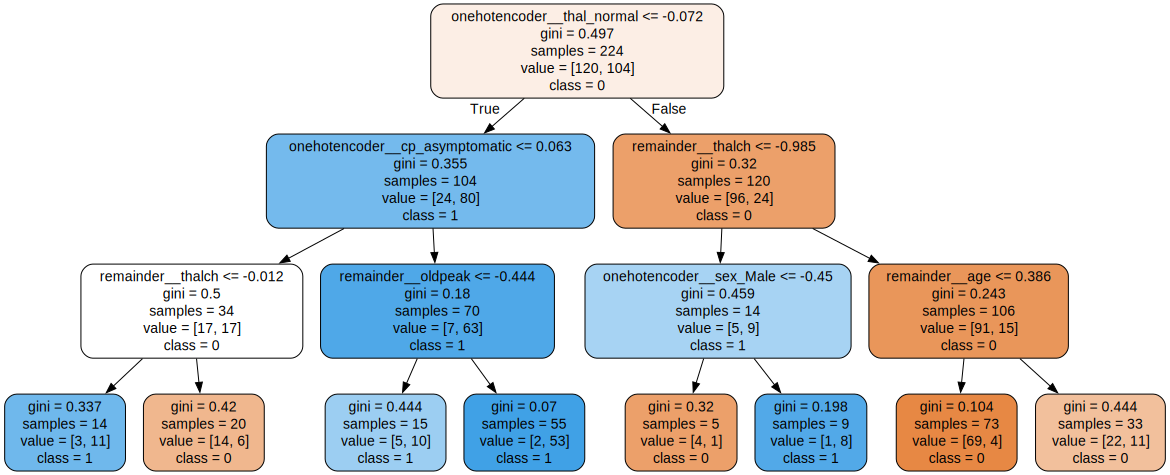

In [14]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["0", "1", "2", "3"])
grafico = graphviz.Source(dot_data)
grafico